
<img src="images.png" align="right" alt="mdx uni" title="mdx uni" />


###  <font color='gray'>Faculty of Science and Technology</font>

## <font color='darkblue'> Crime Data Anlaysis and Clustering </font>

---

 ###### T. Aljrees,   D. Windridge , D. Shi,  X. Cheng 

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="Click here to toggle on/off the raw code."></form>''')


<a href="thesis.pdf"><img src="pdf_icon_png_997057.png"  />Downlaod Turki Thesis Pdf </a>

<a id='hyperlink'></a>
## <center>  Tasks and Agenda :</center>

**Table of agenda :**<br>

   - [Overview, adn The ideas or concepts (Seriouse 1 )](#0a)
   - [Data Insight (Seriouse 2)](#0) 
   - [Data Cleaning (Seriouse 3)](#1) 
   - [Data Exploration (Seriouse 4 )](#2) 
   - [Data Integration (Seriouse 5)](#3)  
   - [Feature Transformation (Feature Engineering) (Seriouse 6)](#4)   
   - [Feature Selction  and model building (Seriouse 7)](#6)   
   - [Data Test / Training(Seriouse 8)](#7)  
   - [Applying advanced subspace Clustering(Seriouse 9)](#8)  



In [7]:
summaryall = pd.read_csv("summaryall.csv",error_bad_lines=False,nrows = 10000)
summaryall

Name   Features  Numeric  Folat  Object  Sclaed Dummies Missing   \
0            data         19        2      3      14   False      No      Yes   
1         IntNoDum        19       19      0       0   False      No       No   
2  Missing0filling        19        2      3      14   False      No       No   
3      NoDumScaled        18       18      0       0    True      No       No   
4      dumNoscaled       185      183      2       0   False     Yes       No   
5        dumScaled       185        0    185       0    True     Yes       No   
6   dummiesCorrect       185      178      2       5   False     Yes      Yes   
7       dummiesNum       225      225      0       0   False     Yes      Yes   

  Memory uage +                                               Note   
0        1.4+ MB                                     Original data   
1        1.4  MB                         Original data but numeric   
2        1.4+ MB                                      Missing and 0  
3         1.4 MB                             scaled of IntNoDum.csv  
4        1.41 MB                          Dum No scaled of orginal   
5        1.41 MB                          scaled of dumNoscaled.csv  
6       14.1+ MB               dummies no scaled no nmeric MISSING   
7        17.2 MB  Dummies for Town and Offecnce kept rest Object...

#### **Note **

Data been through many tasks before Clustring and data reduction : 

That included preparing data 

    
    - Data Claening 
    - Distribution of Features
    - Identfiying missing values in  dataset
    - Handlled mising data 
    - visualaisation
    - converted categorical and ordinal features into numeric features
    - Created dummy features
    - Transformed a categorical feature into a set of dummy features, each representing a unique category
    - Transformed a categorical feature into a numeric values
    - scaling , and Normalisation 
    
 This document for :
 
    - Corrleation (scaled and nonscaled )
    - Clustering of both data (scaled and nonscaled )
        - Drop highly correlated features
    - PCA both (scaled and nonscaled ) Feature Extraction 
    - k-fold  , Elbow method to select optimal K
    - Checking optimal number of Clusters

---

In [92]:
# before clustering 
IntNoDumKmeans.columns

Index(['Crime_Ref', 'Crime_Num', 'Date_First_Committed',
       'Time_First_Committed', 'Day_First_Committed', 'Date_Last_Committed',
       'Time_Last_Committed', 'Day_Last_Committed', 'Street', 'District',
       'Town', 'Post_Code', 'Offence', 'MO_Desc', 'Beat_Num', 'HOMC_Code',
       'HOOC_Code', 'Northing', 'Easting', 'kmeans'],
      dtype='object')

In [17]:
scaled_IntNoDumKmean.columns

Index(['Crime_Ref', 'Crime_Num', 'Date_First_Committed',
       'Time_First_Committed', 'Day_First_Committed', 'Date_Last_Committed',
       'Time_Last_Committed', 'Day_Last_Committed', 'Street', 'District',
       'Town', 'Post_Code', 'Offence', 'MO_Desc', 'Beat_Num', 'HOMC_Code',
       'HOOC_Code', 'Northing', 'Easting'],
      dtype='object')

# Correlation

## correlation of data

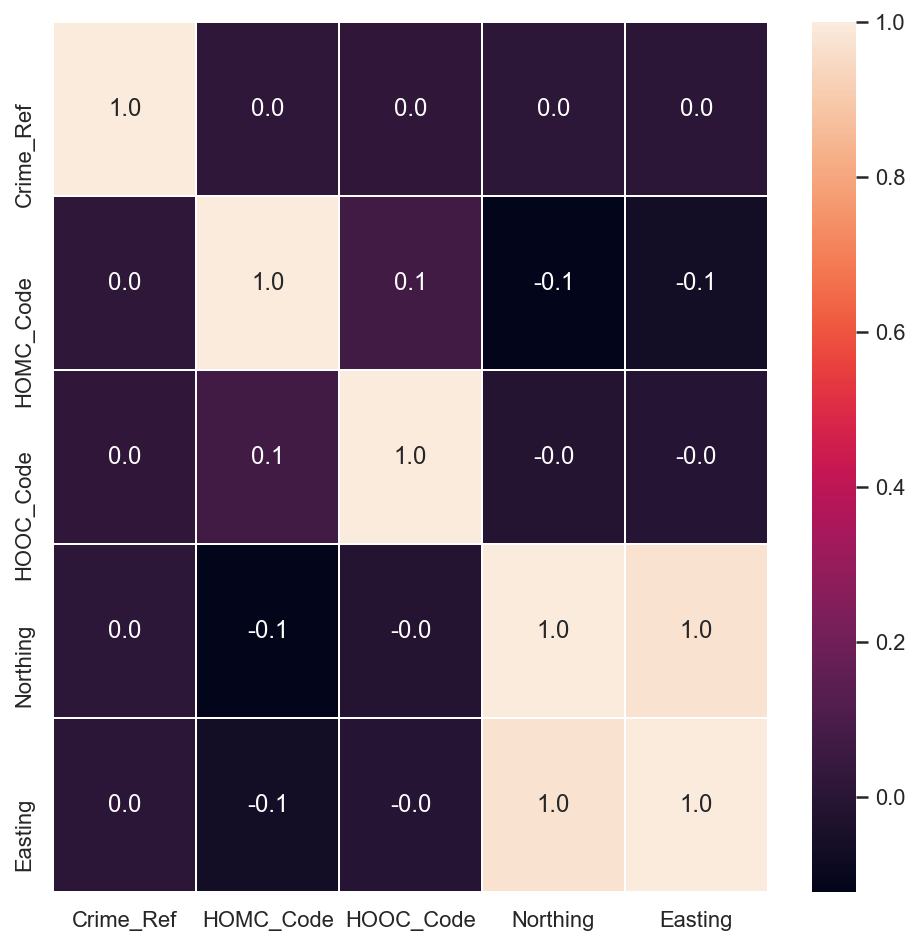

In [27]:
#data
#correlation map
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, fmt= '.1f',ax=ax)
plt.show()

## correlation of scaled_IntNoDumKmean

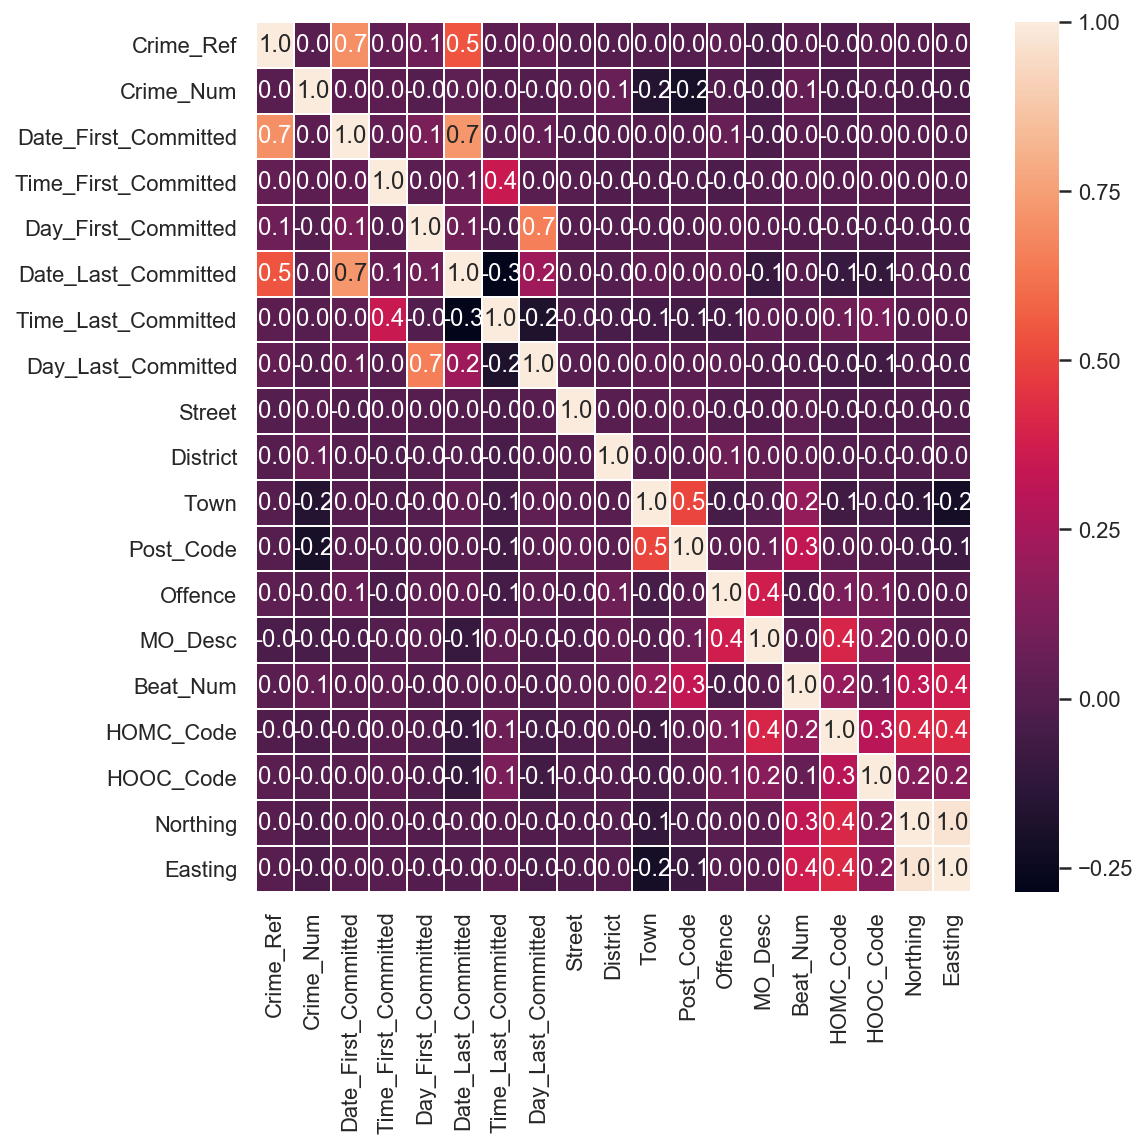

In [25]:
#correlation map
#note tha ; correlation of scaled_IntNoDumKmeant this is before kmean 
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(scaled_IntNoDumKmean.corr(), annot=True, linewidths=0.5, fmt= '.1f',ax=ax)
plt.show()

## correlation of IntNoDum

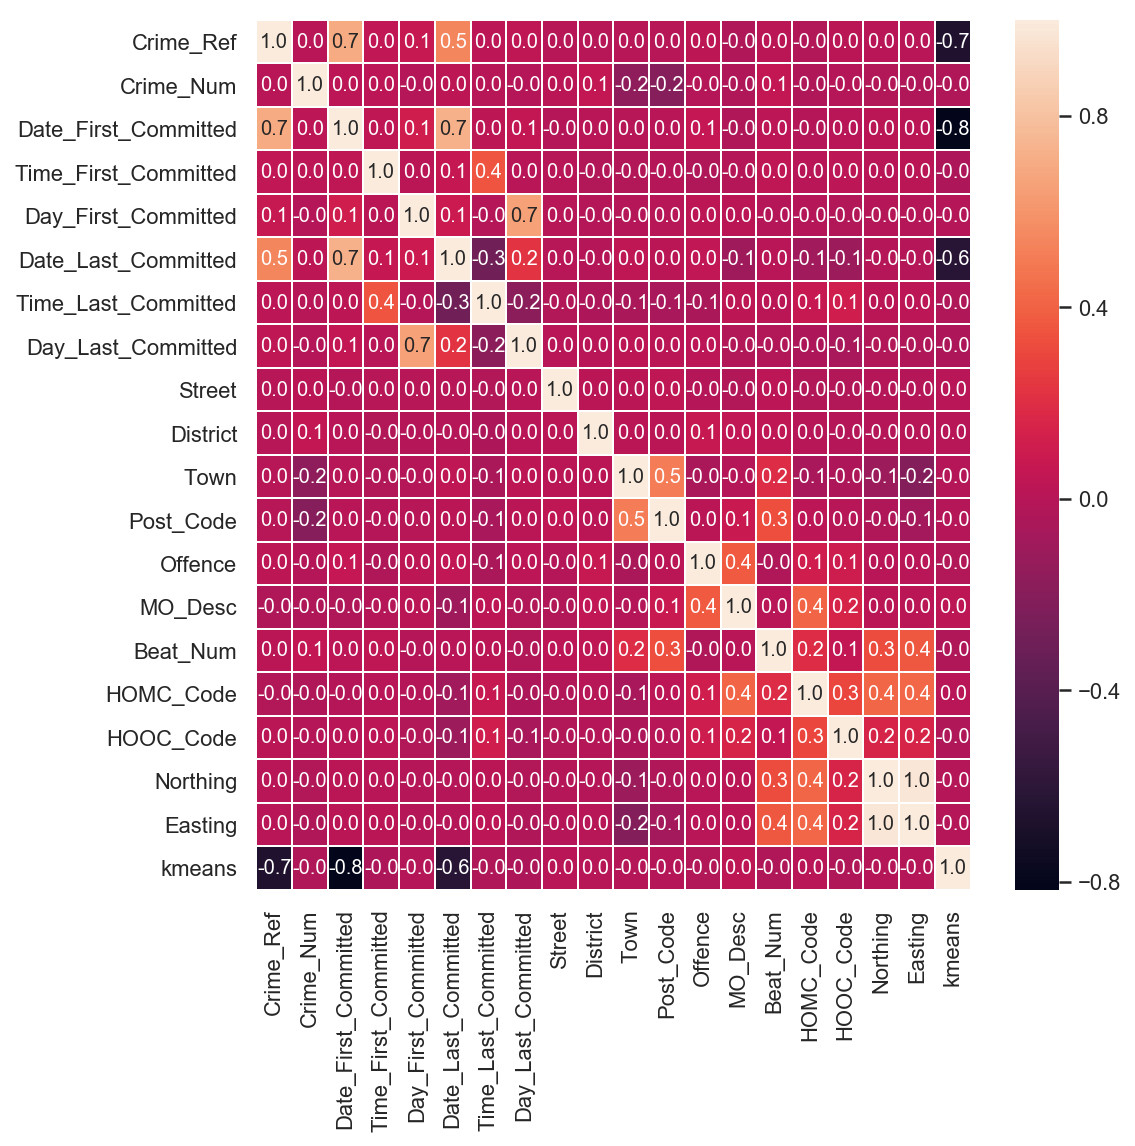

In [125]:
#intdum 
#correlation map
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(IntNoDum.corr(), annot=True, linewidths=0.5, fmt= '.1f',ax=ax)
plt.show()

# correlation of dummiesNum

In [127]:
dummiesNum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 225 entries, Street to Day_First_Committed_WED
dtypes: int64(225)
memory usage: 17.2 MB


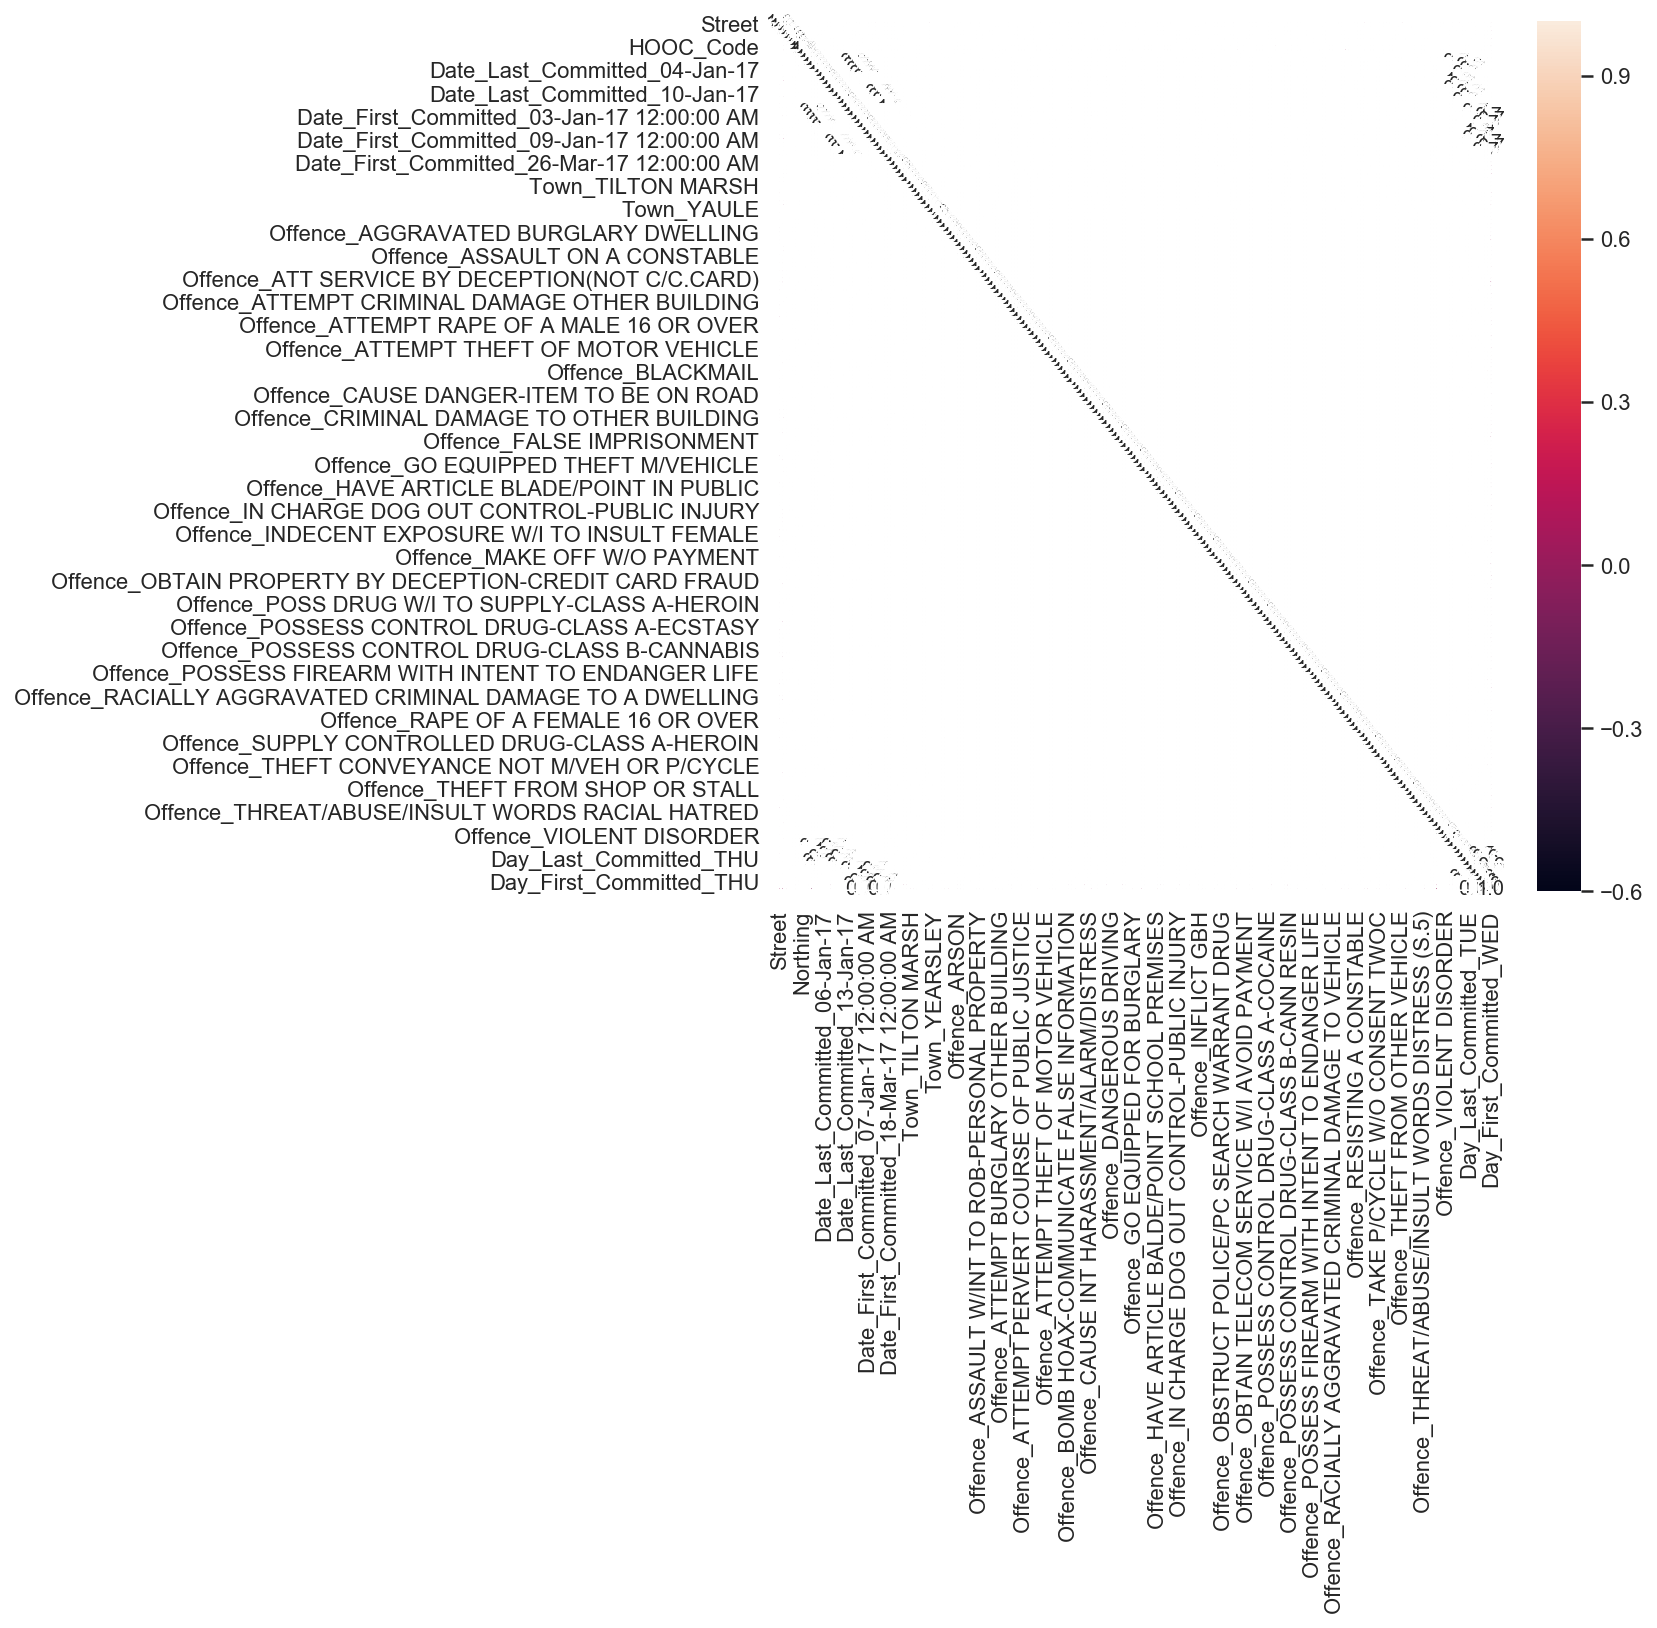

In [126]:


#dummiesNum
#correlation map
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(dummiesNum.corr(), annot=True, linewidths=0.5, fmt= '.1f',ax=ax)
plt.show()

# Plot 

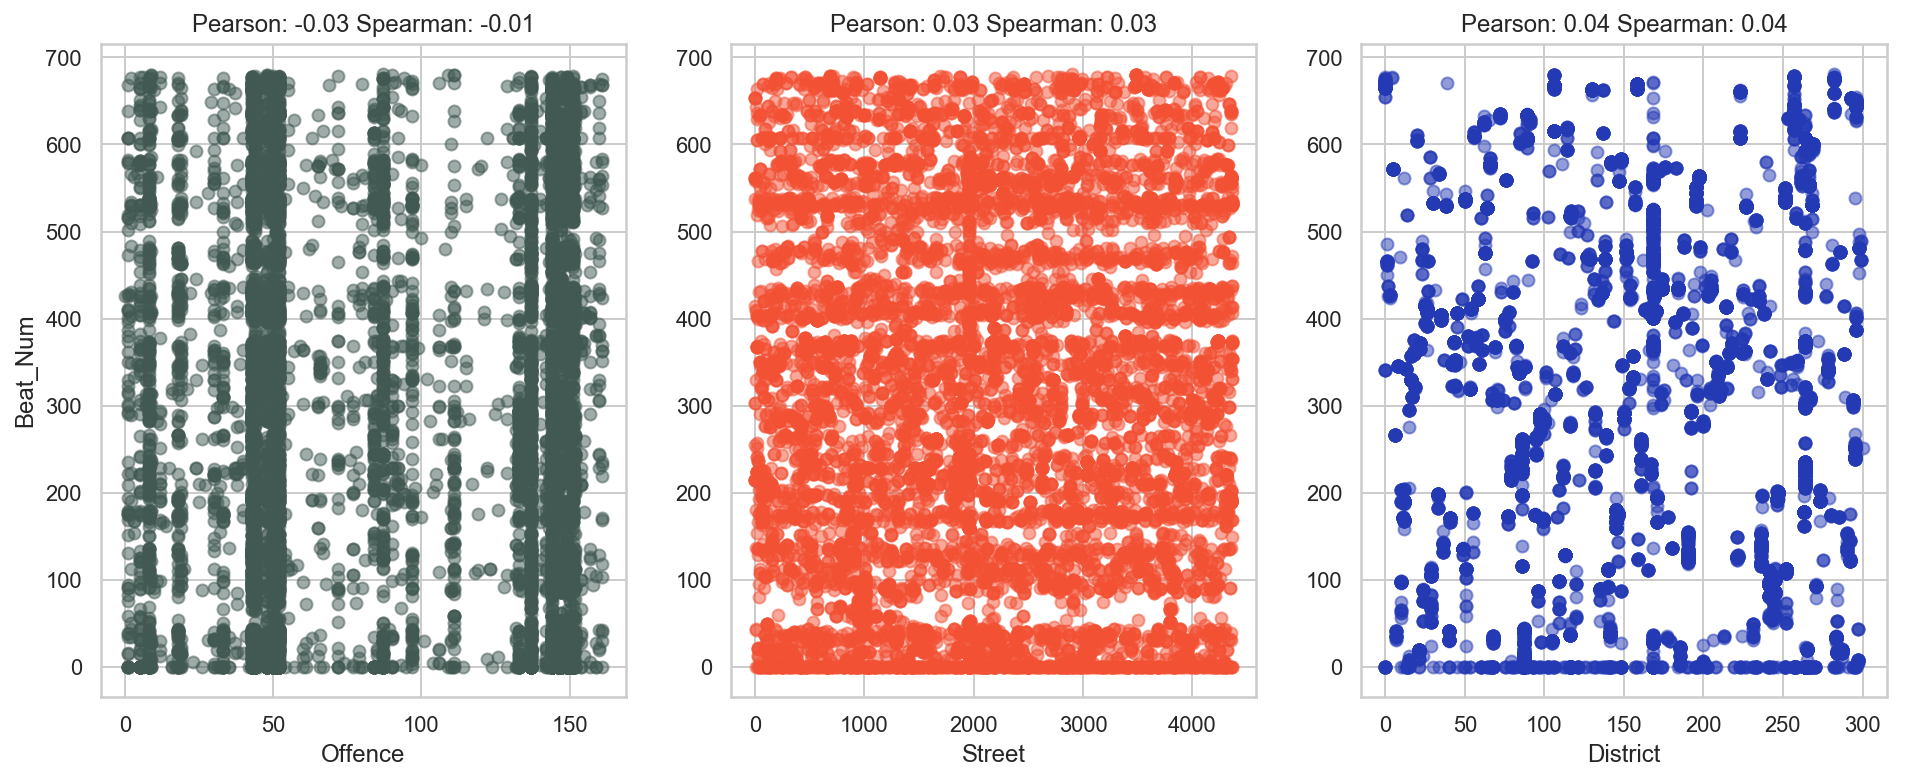

In [131]:
# plot scaleed correlated values 
plt.rcParams['figure.figsize'] = [16, 6]

fig, ax = plt.subplots(nrows=1, ncols=3)

ax=ax.flatten()

cols = ['Offence', 'Street', 'District']
colors=['#415952', '#f35134', '#243AB5', '#243AB5']
j=0

for i in ax:
    if j==0:
        i.set_ylabel('Beat_Num')
    i.scatter(IntNoDum[cols[j]], IntNoDum['Beat_Num'],  alpha=0.5, color=colors[j])
    i.set_xlabel(cols[j])
    i.set_title('Pearson: %s'%IntNoDum.corr().loc[cols[j]]['Beat_Num'].round(2)+' Spearman: %s'%scaled_IntNoDum.corr(method='spearman').loc[cols[j]]['Beat_Num'].round(2))
    j+=1

plt.show()

# Kmeans

### Kmeans datset scaled_IntNoDumKmean

In [67]:
def doKmeans(scaled_IntNoDumKmean, nclust=5):
    model = KMeans(nclust)
    model.fit(scaled_IntNoDumKmean)
    clust_labels = model.predict(scaled_IntNoDumKmean)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(scaled_IntNoDumKmean, 2)
kmeans = pd.DataFrame(clust_labels)
scaled_IntNoDumKmean.insert((scaled_IntNoDumKmean.shape[1]),'kmeans',kmeans)

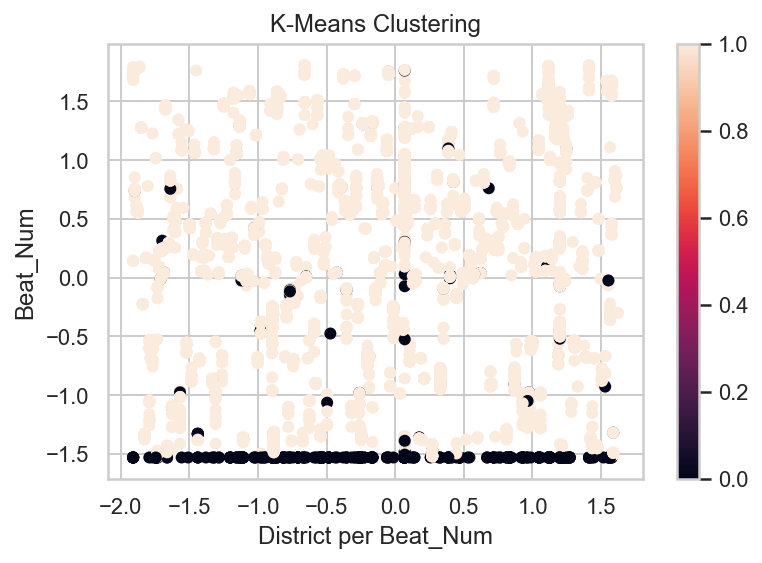

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(scaled_IntNoDumKmean['District'],scaled_IntNoDumKmean['Beat_Num'],
                     c=kmeans[0],s=25)
ax.set_title('K-Means Clustering')
ax.set_xlabel('District per Beat_Num')
ax.set_ylabel('Beat_Num')
plt.colorbar(scatter)

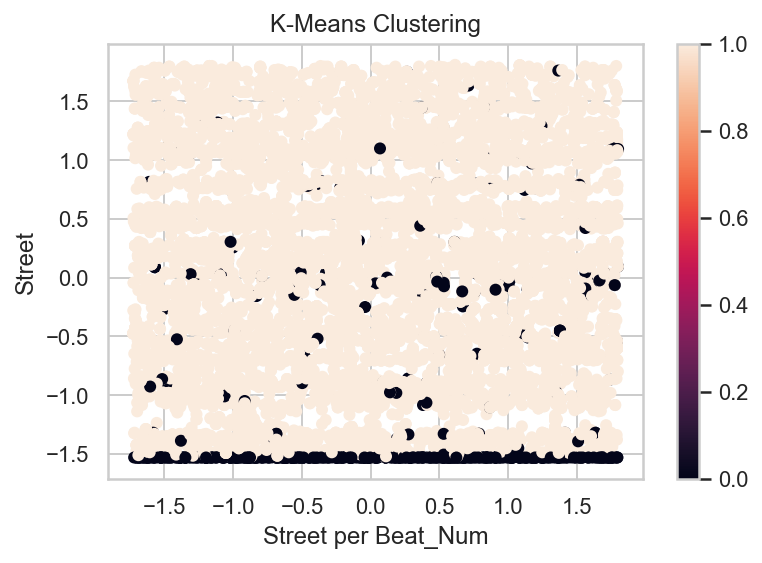

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(scaled_IntNoDumKmean['Street'],scaled_IntNoDumKmean['Beat_Num'],
                     c=kmeans[0],s=25)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Street per Beat_Num')
ax.set_ylabel('Street')
plt.colorbar(scatter)

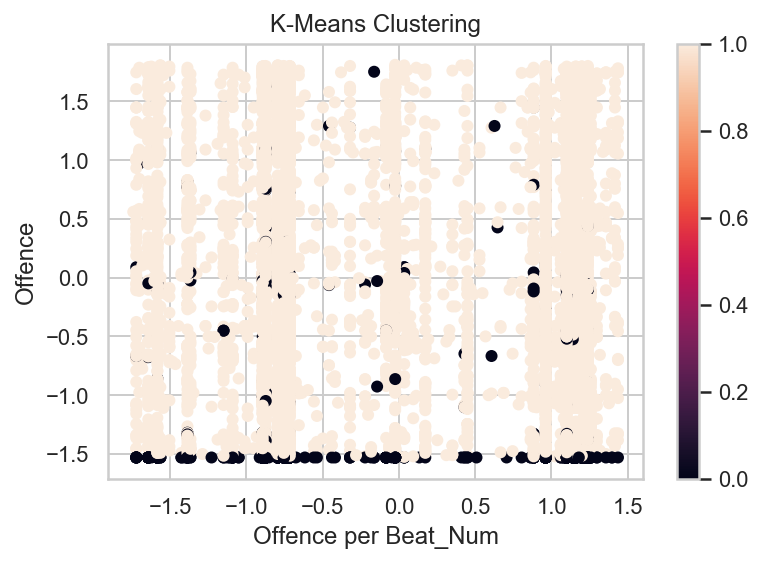

In [74]:
#Offence

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(scaled_IntNoDumKmean['Offence'],scaled_IntNoDumKmean['Beat_Num'],
                     c=kmeans[0],s=25)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Offence per Beat_Num')
ax.set_ylabel('Offence')
plt.colorbar(scatter)

### Kmeans datset not Scaled and  not dummy

In [81]:
def doKmeans(IntNoDum, nclust=5):
    model = KMeans(nclust)
    model.fit(IntNoDum)
    clust_labels = model.predict(IntNoDum)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(IntNoDum, 2)
kmeans = pd.DataFrame(clust_labels)
IntNoDum.insert((IntNoDum.shape[1]),'kmeans',kmeans)

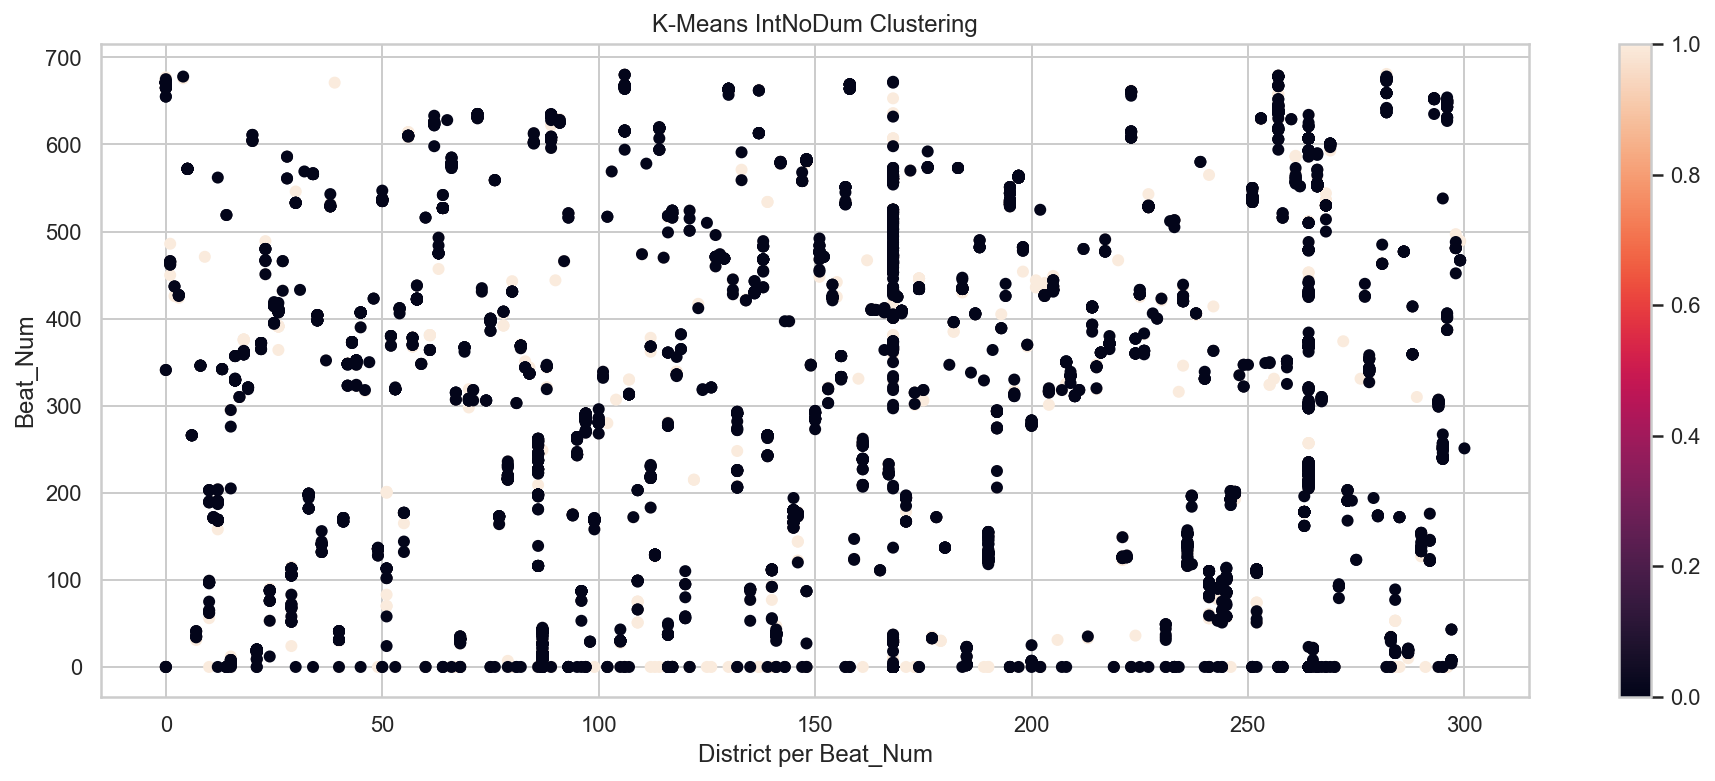

In [118]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(IntNoDum['District'],IntNoDum['Beat_Num'],
                     c=kmeans[0],s=25)
ax.set_title('K-Means IntNoDum Clustering')
ax.set_xlabel('District per Beat_Num')
ax.set_ylabel('Beat_Num')
plt.colorbar(scatter)

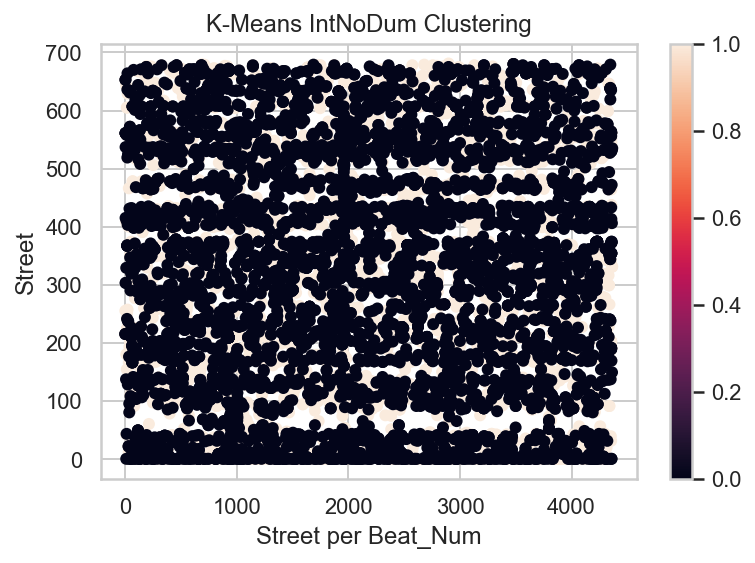

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(IntNoDum['Street'],IntNoDum['Beat_Num'],
                     c=kmeans[0],s=25)
ax.set_title('K-Means IntNoDum Clustering')
ax.set_xlabel('Street per Beat_Num')
ax.set_ylabel('Street')
plt.colorbar(scatter)

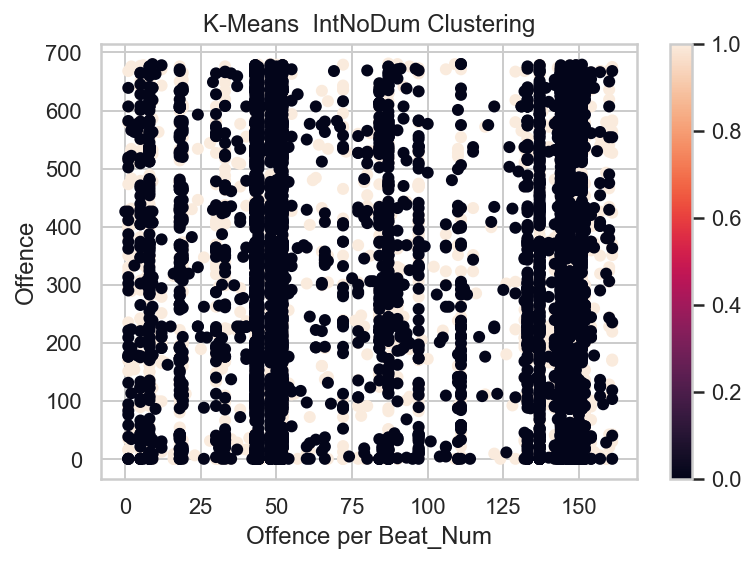

In [85]:
#Offence

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(IntNoDum['Offence'],IntNoDum['Beat_Num'],
                     c=kmeans[0],s=25)
ax.set_title('K-Means  IntNoDum Clustering')
ax.set_xlabel('Offence per Beat_Num')
ax.set_ylabel('Offence')
plt.colorbar(scatter)

In [87]:
IntNoDumKmeans = IntNoDum 

In [88]:
IntNoDumKmeans.columns

Index(['Crime_Ref', 'Crime_Num', 'Date_First_Committed',
       'Time_First_Committed', 'Day_First_Committed', 'Date_Last_Committed',
       'Time_Last_Committed', 'Day_Last_Committed', 'Street', 'District',
       'Town', 'Post_Code', 'Offence', 'MO_Desc', 'Beat_Num', 'HOMC_Code',
       'HOOC_Code', 'Northing', 'Easting', 'kmeans'],
      dtype='object')

In [116]:
IntNoDumKmeans[["Street", "District", "Town", "Post_Code", "Offence", "MO_Desc", "Beat_Num", "kmeans"]].head()

Street  District  Town  Post_Code  Offence  MO_Desc  Beat_Num  kmeans
0     663       146     1       1887      137     1407       176       1
1      27        49     1       1491       50     1407       135       1
2     977       171     1        228       50     1407       194       1
3    2921       130     2       4455       45     1407       662       1
4    1933        35    12       4633       48     1407       404       1

In [114]:
IntNoDumKmeans[["Street", "District", "Town", "Post_Code", "Offence", "MO_Desc", "Beat_Num", "kmeans"]].tail()

Street  District  Town  Post_Code  Offence  MO_Desc  Beat_Num  kmeans
9995    2075       269     2       3717      151     1407       601       0
9996     634        87     1        805       50     1407        40       0
9997     149       287     1       2997      144     1407        19       0
9998     835       297     1       2222       50     1407         8       0
9999     402       151     8       4435       43     1014       478       0

# PCA 

### PCA pf scaled_IntNoDumKmean


In [121]:
from sklearn.decomposition import PCA

pca = PCA(n_components=19)
pca.fit(scaled_IntNoDumKmean)

PCA(copy=True, iterated_power='auto', n_components=19, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

[0.13950782 0.12717133 0.09375714 0.08472489 0.08208253 0.07177517
 0.05725275 0.05165663 0.04890147 0.04687407 0.03825221 0.03735847
 0.02970932 0.02351458 0.02188087 0.0195925  0.01676798 0.00825593
 0.00094326]


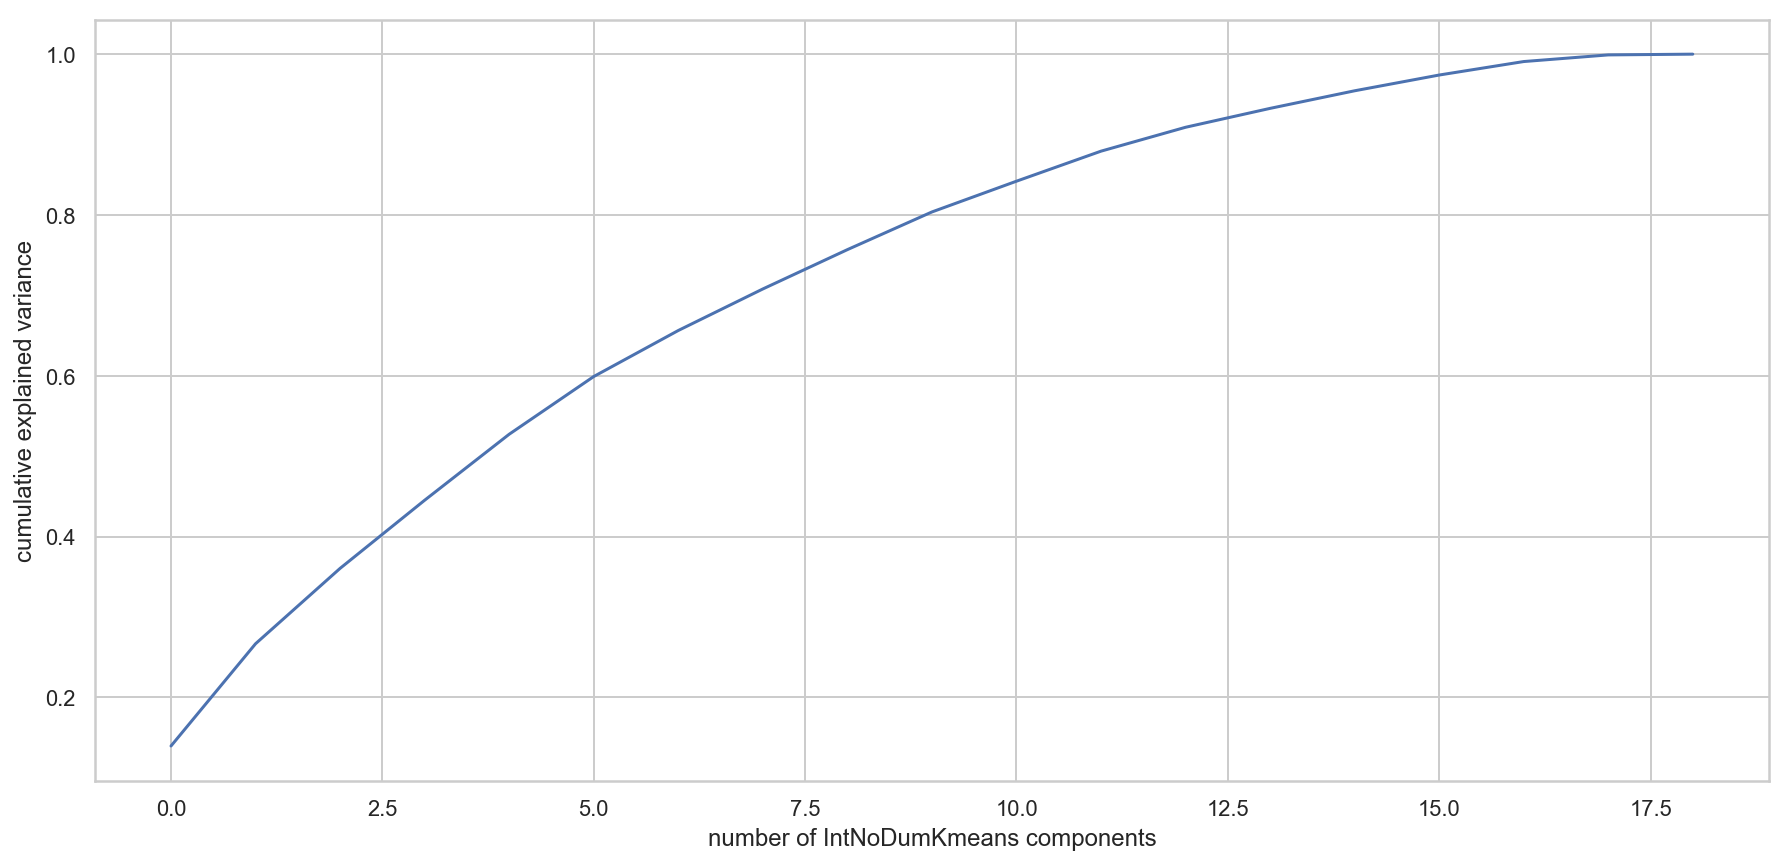

In [122]:
print(pca.explained_variance_ratio_) 
plt.figure(figsize=(15,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of IntNoDumKmeans components')
plt.ylabel('cumulative explained variance');

### PCA of IntNoDumKmeans


In [119]:
from sklearn.decomposition import PCA

pca = PCA(n_components=19)
pca.fit(IntNoDumKmeans)

PCA(copy=True, iterated_power='auto', n_components=19, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

[9.58559366e-01 4.09011545e-02 5.10530113e-04 1.96661251e-05
 5.19544945e-06 3.53598792e-06 2.51020443e-07 1.50817527e-07
 6.55094579e-08 6.26816550e-08 1.65865636e-08 5.02571649e-09
 2.33771557e-10 9.56510585e-11 3.88086965e-11 3.02663700e-11
 1.66509430e-11 6.45157400e-12 2.95703414e-12]


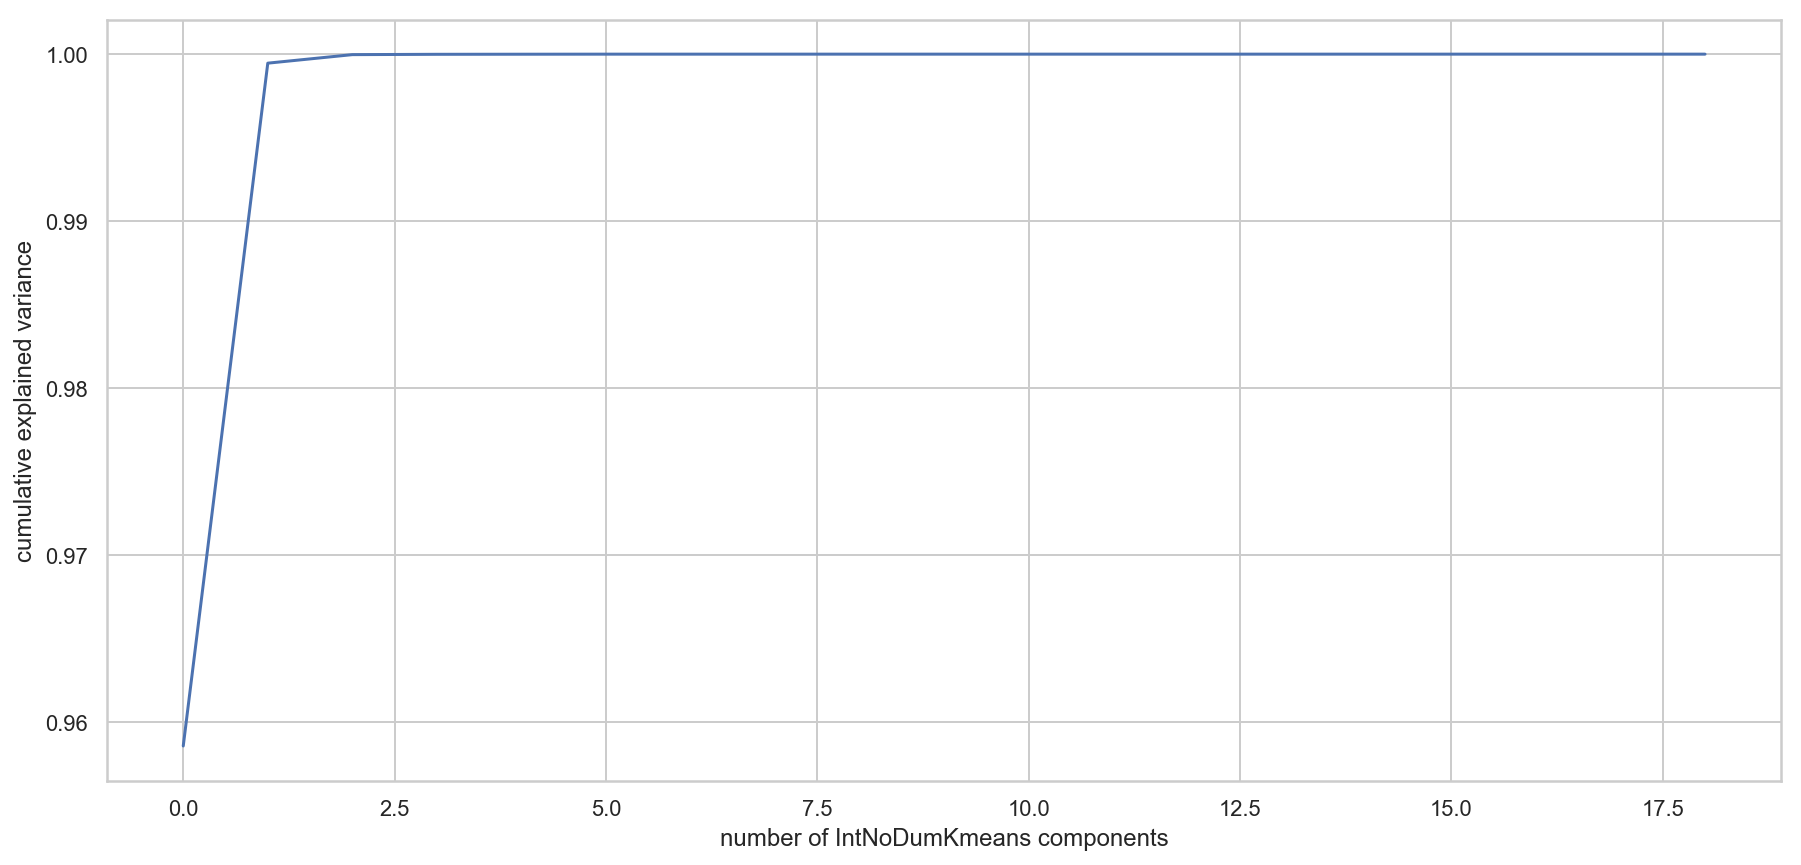

In [120]:
print(pca.explained_variance_ratio_) 
plt.figure(figsize=(15,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of IntNoDumKmeans components')
plt.ylabel('cumulative explained variance');

### PCA pf IntNoDum
IntNoDum

In [123]:
#IntNoDum
from sklearn.decomposition import PCA

pca = PCA(n_components=19)
pca.fit(IntNoDum)

PCA(copy=True, iterated_power='auto', n_components=19, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

[9.58559366e-01 4.09011545e-02 5.10530113e-04 1.96661251e-05
 5.19544945e-06 3.53598792e-06 2.51020443e-07 1.50817527e-07
 6.55094579e-08 6.26816550e-08 1.65865636e-08 5.02571649e-09
 2.33771557e-10 9.56510585e-11 3.88086965e-11 3.02663700e-11
 1.66509430e-11 6.45157400e-12 2.95703414e-12]


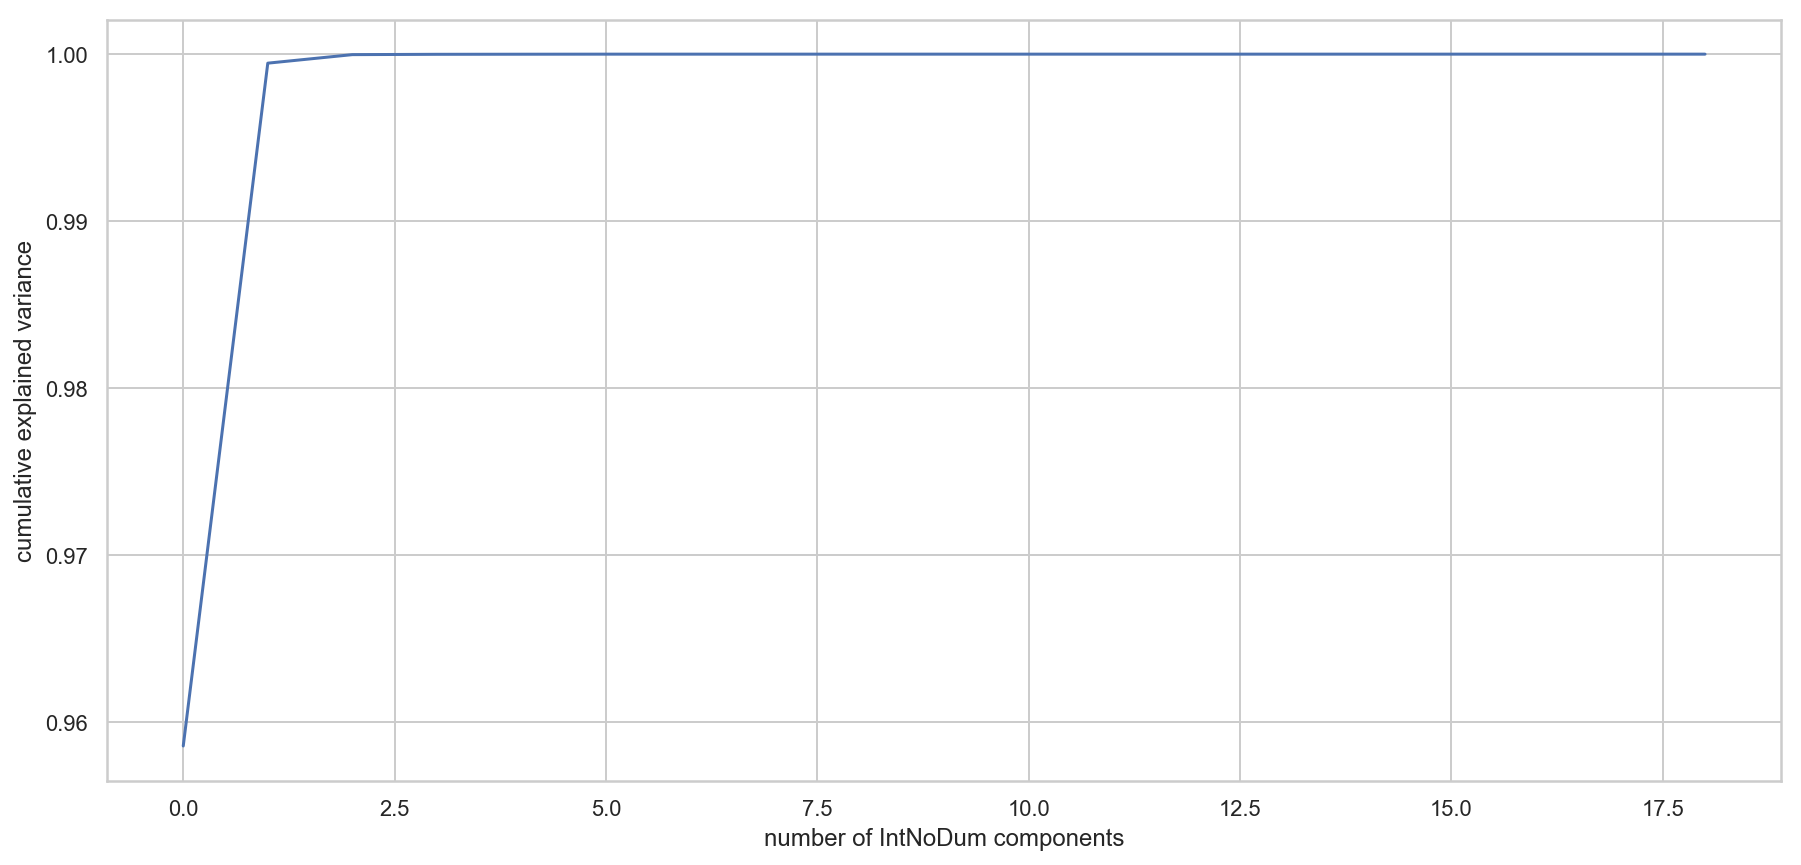

In [124]:
print(pca.explained_variance_ratio_) 
plt.figure(figsize=(15,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of IntNoDum components')
plt.ylabel('cumulative explained variance');

# PCA of Data

In [134]:
data.head()

Crime_Ref       Crime_Num   Date_First_Committed   Time_First_Committed  \
0   81690360  99Y4/463197/19  18-Mar-17 12:00:00 AM  30-Oct-15 09:40:00 PM   
1  122679527     99Y3/274/17  01-Jan-17 12:00:00 AM  30-Oct-15 12:40:00 AM   
2  122679664     99Y5/274/17  01-Jan-17 12:00:00 AM  30-Oct-15 12:14:00 AM   
3  122679801     99K5/548/17  01-Jan-17 12:00:00 AM  30-Oct-15 12:20:00 AM   
4  122680623     99F4/274/17  01-Jan-17 12:00:00 AM  30-Oct-15 12:25:00 AM   

  Day_First_Committed Date_Last_Committed    Time_Last_Committed  \
0                 SAT           18-Mar-17  30-Oct-15 09:55:00 PM   
1                 SUN                   -                    NaN   
2                 SUN           01-Jan-17  30-Oct-15 12:15:00 AM   
3                 SUN                   -                    NaN   
4                 SUN           01-Jan-17  30-Oct-15 12:32:00 AM   

  Day_Last_Committed            Street       District        Town Post_Code  \
0                SAT     BUNTINGS LANE  LORDS ORCHARD  CARSINGTON   B38 8AP   
1                NaN         ADMINGTON     CRAMINGTON  CARSINGTON   B32 3HS   
2                SUN       COKERS LANE       NAYBAIRN  CARSINGTON   B13 9DX   
3                NaN       OCEAN CLOSE  ISTREAY BROOK    DEWMAPLE       NaN   
4                SUN  HERBERT CRESCENT      CHARLMERE   YARNFORTH   WS2 0LU   

                            Offence MO_Desc Beat_Num  HOMC_Code  HOOC_Code  \
0  TAKE MOTOR/VEH W/O OWNER CONSENT     NaN     E426       48.0        2.0   
1       CRIMINAL DAMAGE TO DWELLING     NaN     E320       58.0        3.0   
2       CRIMINAL DAMAGE TO DWELLING     NaN     E536       58.0        3.0   
3   CAUSE DANGER-ITEM TO BE ON ROAD     NaN     M541        5.0       11.0   
4                    COMMON ASSAULT     NaN     H457      105.0        1.0   

   Northing  Easting  
0    279100   403600  
1    282400   400600  
2    283400   408200  
3    282100   433600  
4    299600   398700

In [145]:
data.columns

Index(['Crime_Ref', 'Crime_Num', 'Date_First_Committed',
       'Time_First_Committed', 'Day_First_Committed', 'Date_Last_Committed',
       'Time_Last_Committed', 'Day_Last_Committed', 'Street', 'District',
       'Town', 'Post_Code', 'Offence', 'MO_Desc', 'Beat_Num', 'HOMC_Code',
       'HOOC_Code', 'Northing', 'Easting'],
      dtype='object')

In [144]:
data = pd.read_csv("Crime_comma.csv",error_bad_lines=False,nrows = 10000)


b'Skipping line 7851: expected 19 fields, saw 20\n'


In [146]:
#drop
data = scaled_IntNoDumKmean.drop(['Crime_Ref', 'Crime_Num'], axis=1)

In [147]:
## EROR becuse could not convert string to float: '99Y4/463197/19'
## we need to drop string 
from sklearn.decomposition import PCA

pca = PCA(n_components=18)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

[1.55514554e-01 1.18204053e-01 1.00508417e-01 9.24238967e-02
 8.43684454e-02 8.00716050e-02 5.98140695e-02 5.75482462e-02
 5.20112239e-02 4.23112219e-02 4.01689565e-02 3.57224718e-02
 2.70928940e-02 2.43657436e-02 1.89805612e-02 9.76248208e-03
 1.09919718e-03 3.19611171e-05]


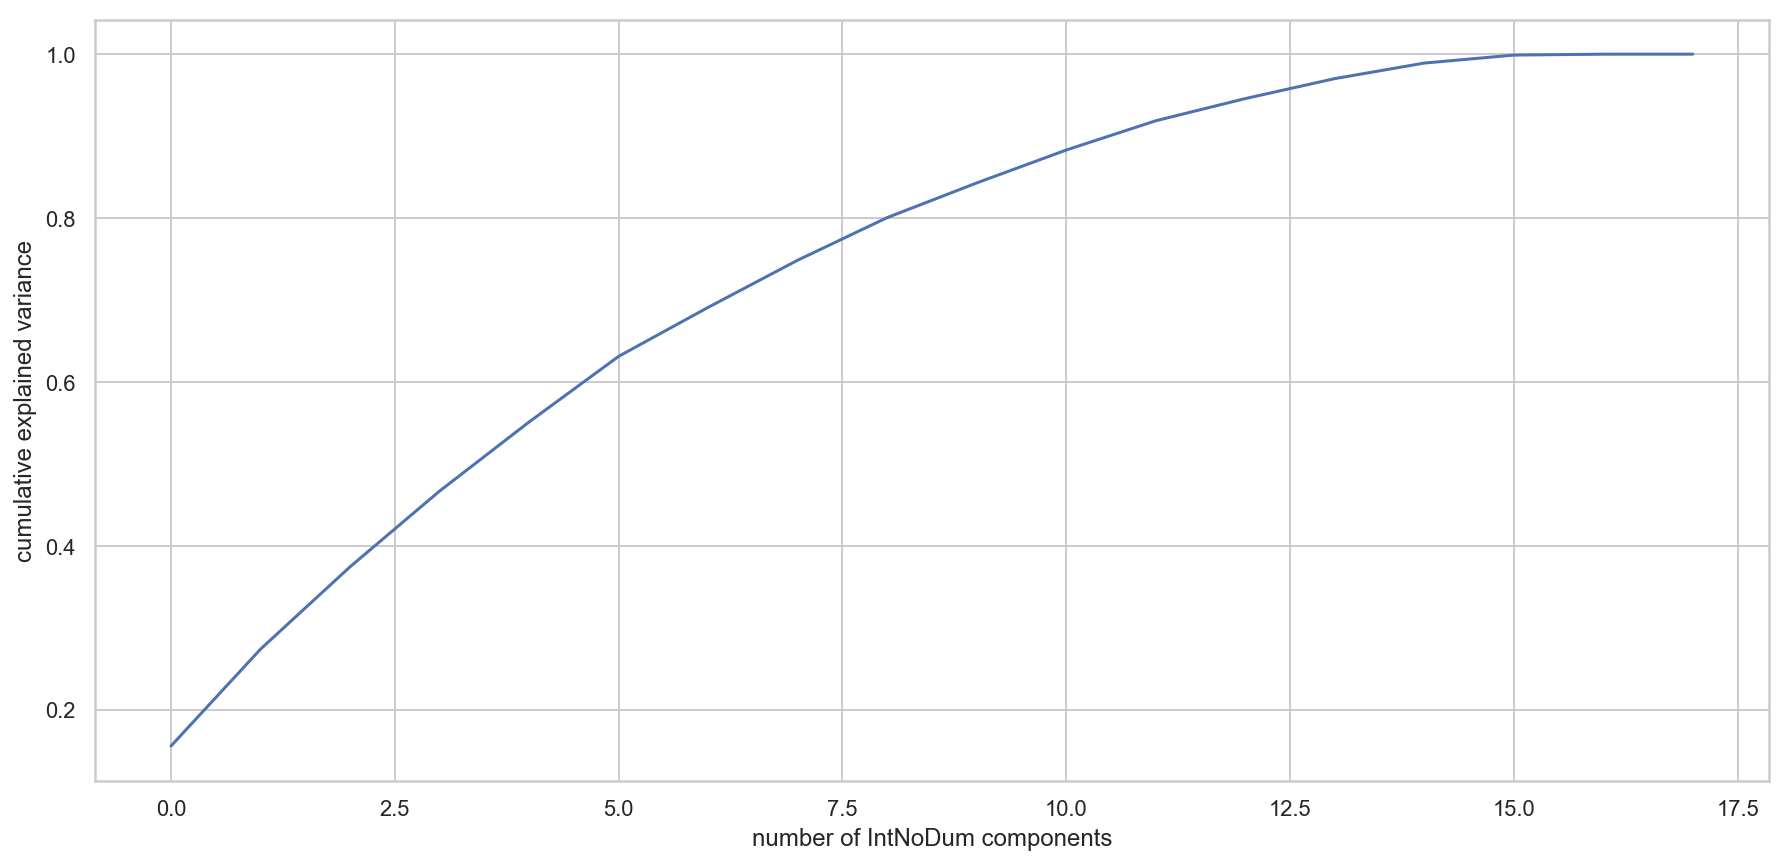

In [148]:
print(pca.explained_variance_ratio_) 
plt.figure(figsize=(15,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of IntNoDum components')
plt.ylabel('cumulative explained variance');

Computes the Euclidean distance between two 1-D arrays.

The **Euclidean** distance between 1-D arrays `u` and `v`, is defined as

.. math::

$${||u-v||}_2$$

$$\left(\sum{(w_i |(u_i - v_i)|^2)}\right)^{1/2}$$
   

**Manhattan** distance between two 1-D arrays `u` and `v`,which is defined as

.. math::

   $$\sum_i {\left| u_i - v_i \right|}.$$
   
and known inpython as `dist.cityblock(AA, BB)`

Parameters

u : (N,) array_like
    Input array.
    
v : (N,) array_like
    Input array.
    
   
w : (N,) array_like, 

optional
    The weights for each value in `u` and `v`. Default is None, which gives each value a weight of 1.0
    
    
    
**Chebyshev** -- also chessboard -- distance is best defined as a distance metric
    
 math::

  $$ \max_i {|u_i-v_i|}.$$



the **Cosine** distance Compute distance between 1-D arrays. between `u` and `v`, is defined as

math::

$$ 1 - \frac{u \cdot v} {||u||_2 ||v||_2}  $$

 

where :math:`u \cdot v` is the dot product of :math:`u` and
:math:`v`.

In [56]:
import scipy.spatial.distance as dist
dist.euclidean(scaled_IntNoDumKmean.District, scaled_IntNoDumKmean.Offence)

136.16128468451845

In [58]:
print('\nEuclidean distance is =', dist.euclidean(scaled_IntNoDumKmean.District, scaled_IntNoDumKmean.Offence))
print()
print('Manhattan distance is =', dist.cityblock(scaled_IntNoDumKmean.District, scaled_IntNoDumKmean.Offence))
print()
print('Chebyshev distance is =', dist.chebyshev(scaled_IntNoDumKmean.District, scaled_IntNoDumKmean.Offence))
print()
print('Canberra distance is =', dist.canberra(scaled_IntNoDumKmean.District, scaled_IntNoDumKmean.Offence))
print()
print('Cosine distance is =', dist.cosine(scaled_IntNoDumKmean.District, scaled_IntNoDumKmean.Offence))


Euclidean distance is = 136.16128468451845

Manhattan distance is = 10896.445278705507

Chebyshev distance is = 3.346038228005617

Canberra distance is = 6517.9148762752975

Cosine distance is = 0.9269947723469238


In [60]:
#Chebyshev -- also chessboard -- distance is best defined as a distance metric
dist.cityblock(scaled_IntNoDumKmean.District, scaled_IntNoDumKmean.Offence)

10896.445278705507

In [62]:
dist.chebyshev(scaled_IntNoDumKmean.District, scaled_IntNoDumKmean.Offence)

3.346038228005617

In [63]:
dist.cosine(scaled_IntNoDumKmean.District, scaled_IntNoDumKmean.Offence)

0.9269947723469238

$$a = hav(Δφ)+cos(φ1)⋅cos(φ2)⋅hav(Δλ) $$